In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import EarlyStopping

ModuleNotFoundError: No module named 'tensorflow'

In [7]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5127462875452369175
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 2910112974
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1726016804330073331
physical_device_desc: "device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1"
xla_global_id: 416903419
]


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
df = pd.read_csv(r'C:\Users\thesh\OneDrive\Máy tính\AI\data\iris.data')
# df = pd.read_csv('/content/drive/Computers/ My Laptop/AI/data/iris.data')


In [9]:
df.columns= ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


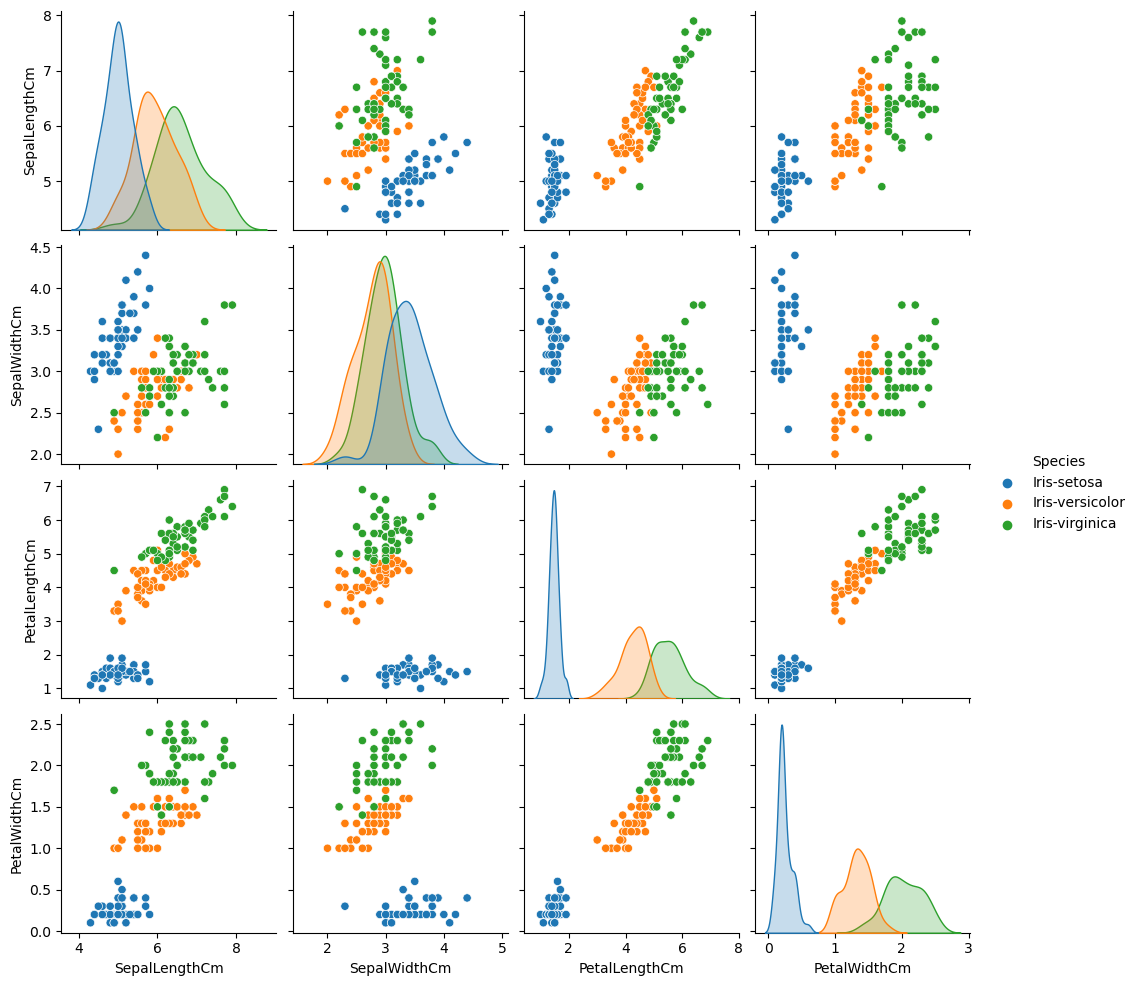

In [11]:
sns.pairplot(df,hue='Species')

In [12]:
#Loc ra tat ca cac phan tu du doan
target_names = df['Species'].unique()
target_names

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [13]:
target_dict = {n:i for i,n in enumerate(target_names)}
target_dict

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [14]:
X= df.drop(['Species'],axis=1)

In [15]:
y= df['Species'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

In [16]:
from tensorflow.keras.utils import to_categorical

In [17]:
y_cat = to_categorical(y)

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X.values,y_cat,test_size = .2,random_state=1)

In [ ]:
X_train.shape

(119, 4)

In [ ]:
y_train.shape

(119, 3)

### Tao Model

In [19]:
model = Sequential()
model.add(Dense(4,input_shape=(4,),activation='sigmoid'))
model.add(Dense(3,activation = 'tanh'))
model.add(Dense(3,activation = 'softmax'))
model.compile(Adam(learning_rate=.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dense_1 (Dense)             (None, 3)                 15        
                                                                 
 dense_2 (Dense)             (None, 3)                 12        
                                                                 
Total params: 47
Trainable params: 47
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.fit(X_train,y_train,epochs=40,validation_split=0.1)

Epoch 1/40
4/4 [==============================] - 2s 90ms/step - loss: 1.1536 - accuracy: 0.3364 - val_loss: 1.0743 - val_accuracy: 0.2500
Epoch 2/40
4/4 [==============================] - 0s 22ms/step - loss: 1.0724 - accuracy: 0.3551 - val_loss: 0.9378 - val_accuracy: 0.8333
Epoch 3/40
4/4 [==============================] - 0s 22ms/step - loss: 0.8988 - accuracy: 0.7570 - val_loss: 0.6790 - val_accuracy: 0.7500
Epoch 4/40
4/4 [==============================] - 0s 21ms/step - loss: 0.6288 - accuracy: 0.6822 - val_loss: 0.5154 - val_accuracy: 0.7500
Epoch 5/40
4/4 [==============================] - 0s 22ms/step - loss: 0.4982 - accuracy: 0.6916 - val_loss: 0.4765 - val_accuracy: 0.7500
Epoch 6/40
4/4 [==============================] - 0s 21ms/step - loss: 0.4617 - accuracy: 0.6822 - val_loss: 0.4649 - val_accuracy: 0.7500
Epoch 7/40
4/4 [==============================] - 0s 21ms/step - loss: 0.4220 - accuracy: 0.7383 - val_loss: 0.4326 - val_accuracy: 0.8333
Epoch 8/40
4/4 [===========

In [21]:
y_pred= model.predict(X_test)

1/1 [==============================] - 0s 106ms/step


In [22]:
y_pred[:5]

array([[1.2348368e-06, 1.1886932e-02, 9.8811185e-01],
       [2.3976313e-04, 8.9846128e-01, 1.0129890e-01],
       [2.5527112e-04, 9.1400123e-01, 8.5743487e-02],
       [2.4042571e-04, 8.9663017e-01, 1.0312945e-01],
       [4.8087144e-04, 9.8534471e-01, 1.4174364e-02]], dtype=float32)

In [23]:
y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

In [ ]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,log_loss

In [ ]:
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         7

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
confusion_matrix(y_test_class,y_pred_class)

array([[10,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  7]], dtype=int64)

In [ ]:
log_loss(y_test_class,y_pred)

0.013145796428822602

In [ ]:
loss,accuracy = model.evaluate(X_test,y_test)

print('Loss ' + str(loss))
print('Accuracy ' + str(accuracy))

1/1 [==============================] - 0s 22ms/step - loss: 0.0131 - accuracy: 1.0000
Loss 0.013145798817276955
Accuracy 1.0
